In [4]:
import pandas as pd
import numpy as np
from scipy import stats 
import matplotlib.pyplot as plt
import datetime
from datetime import datetime
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot
#from statsmodels.tsa.arima_model
#import ARIMA
from sklearn.metrics import mean_squared_error

In [7]:
df_shampoo_orig = pd.read_csv('sales-of-shampoo-over-a-three-ye.csv', 
                              nrows=36,
                              skiprows = 1, 
                              names = ['ds', 'y'], 
                              parse_dates = True )
df = df_shampoo_orig
df

,ds,y
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3
5,1-06,168.5
6,1-07,231.8
7,1-08,224.5
8,1-09,192.8
9,1-10,122.9


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      36 non-null     object 
 1   y       36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


In [9]:
df['ds']=df['ds'].apply(lambda x:'198'+x)
df.head()

,ds,y
0,1981-01,266.0
1,1981-02,145.9
2,1981-03,183.1
3,1981-04,119.3
4,1981-05,180.3


In [11]:
df['ds']=pd.to_datetime(df['ds'])

In [12]:
df.set_index(['ds'], inplace=True)

In [13]:
df.head()

,y
ds,
1981-01-01,266.0
1981-02-01,145.9
1981-03-01,183.1
1981-04-01,119.3
1981-05-01,180.3


In [14]:
df.describe()

,y
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


<AxesSubplot:xlabel='ds'>

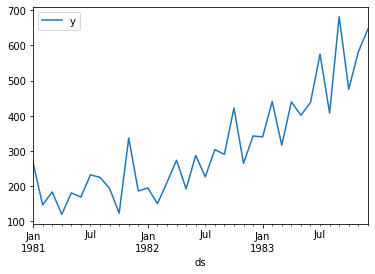

In [16]:
df.plot()

In [17]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [18]:
test_result=adfuller(df['y'])

In [19]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [20]:
adfuller_test(df['y'])

ADF Test Statistic : 3.0601420836411797
p-value : 1.0
#Lags Used : 10
Number of Observations Used : 25
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [21]:
df['y First Difference'] = df['y'] - df['y'].shift(1)

In [22]:
df['Seasonal First Difference']=df['y']-df['y'].shift(12)

In [23]:
df.head()

,y,y First Difference,Seasonal First Difference
ds,,,
1981-01-01,266.0,NaN,NaN
1981-02-01,145.9,-120.1,NaN
1981-03-01,183.1,37.2,NaN
1981-04-01,119.3,-63.8,NaN
1981-05-01,180.3,61.0,NaN


In [24]:
adfuller_test(df['y First Difference'].dropna())

ADF Test Statistic : -7.249074055553854
p-value : 1.7998574141687034e-10
#Lags Used : 1
Number of Observations Used : 33
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<AxesSubplot:xlabel='ds'>

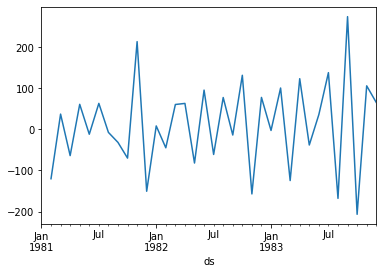

In [26]:
df['y First Difference'].plot()

# Auto Regressive Model

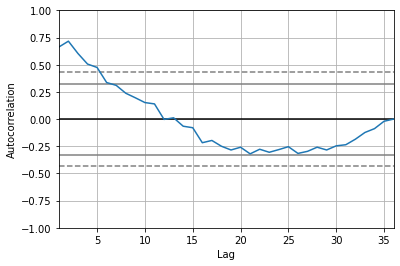

In [32]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['y'])
plt.show()

Final Thoughts on Autocorrelation and Partial Autocorrelation Identification of an AR model is often best done with the PACF.

For an AR model, the theoretical PACF “shuts off” past the order of the model. The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point. Put another way, the number of non-zero partial autocorrelations gives the order of the AR model. By the “order of the model” we mean the most extreme lag of x that is used as a predictor.

Identification of an MA model is often best done with the ACF rather than the PACF.

For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner. A clearer pattern for an MA model is in the ACF. The ACF will have non-zero autocorrelations only at lags involved in the model.

p,d,q p AR model lags d differencing q MA lags

In [33]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

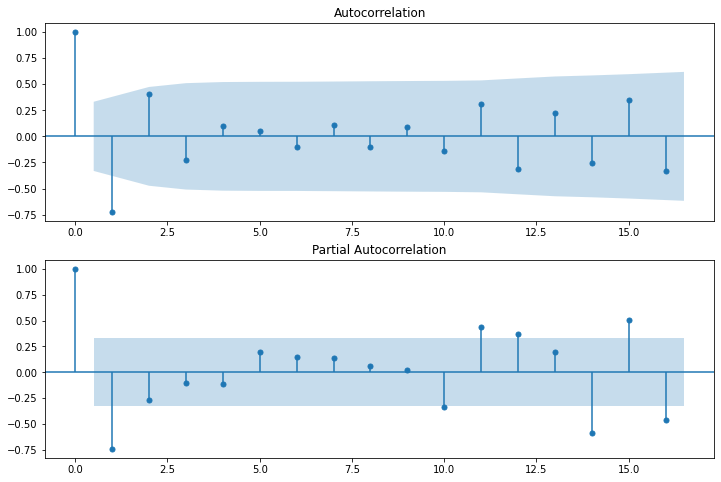

In [36]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['y First Difference'].iloc[1:],ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['y First Difference'].iloc[1:],ax=ax2)

In [37]:
from statsmodels.tsa.arima_model import ARIMA

In [38]:
model=ARIMA(df['y'],order=(1,1,1))
model_fit=model.fit()

/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


In [39]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                    D.y   No. Observations:                   35
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -197.233
Method:                       css-mle   S.D. of innovations             66.625
Date:                Tue, 09 Mar 2021   AIC                            402.467
Time:                        22:43:21   BIC                            408.688
Sample:                    02-01-1981   HQIC                           404.614
                         - 12-01-1983                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.0965      3.651      3.313      0.001       4.940      19.253
ar.L1.D.y     -0.5674      0.161     -3.526      0.000      -0.883      -0.252
ma.L1.D.y     -0.5133      0.155     -3.303      0.001      -0.818      -0.209
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.7625           +0.0000j            1.7625            0.5000
MA.1            1.9483           +0.0000j            1.9483            0.0000
-----------------------------------------------------------------------------
"""

<AxesSubplot:xlabel='ds'>

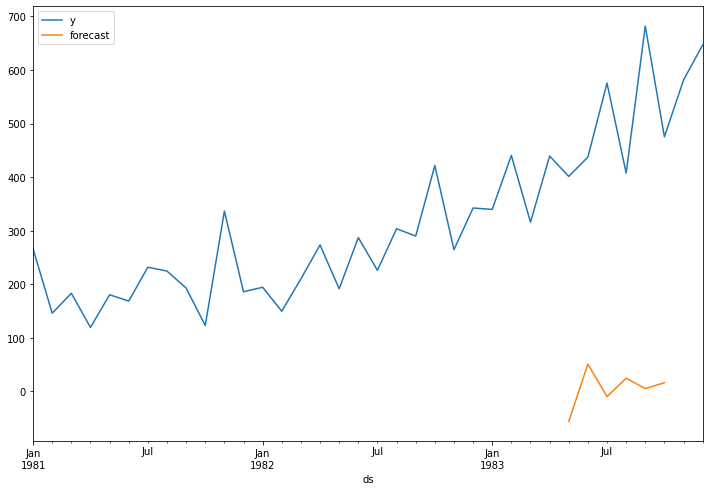

In [40]:
df['forecast']=model_fit.predict(start=28,end=33,dynamic=True)
df[['y','forecast']].plot(figsize=(12,8))

In [41]:
import statsmodels.api as sm

In [96]:
model=sm.tsa.statespace.SARIMAX(df['y'],order=(1, 0, 1),seasonal_order=(1,1,1,9))
results=model.fit()

/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:975: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/asap/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:868

<AxesSubplot:xlabel='ds'>

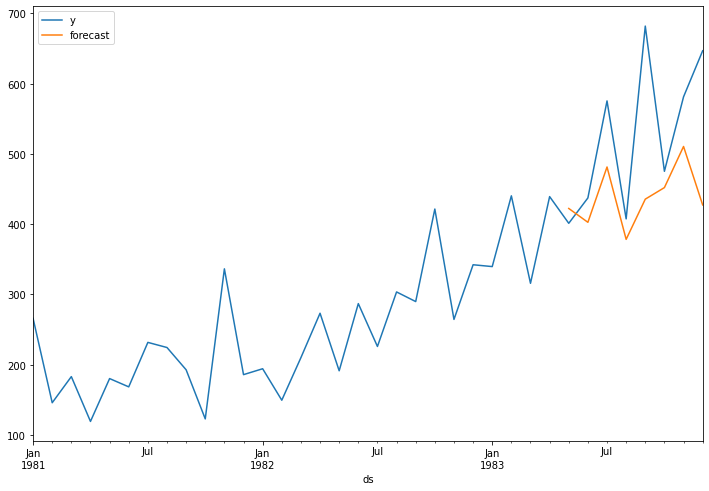

In [98]:
df['forecast']=results.predict(start=28,end=35,dynamic=True)
df[['y','forecast']].plot(figsize=(12,8))

In [99]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [100]:
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

In [101]:
future_df=pd.concat([df,future_datest_df])

<AxesSubplot:>

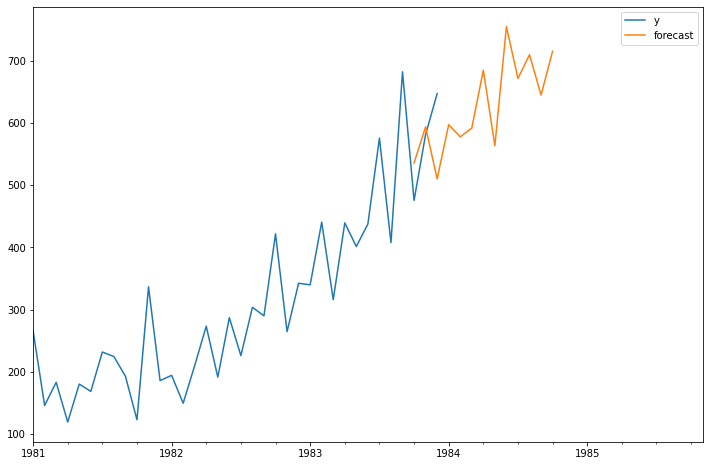

In [103]:
future_df['forecast'] = results.predict(start = 33, end = 45, dynamic= True)  
future_df[['y', 'forecast']].plot(figsize=(12, 8))